In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
df=pd.read_csv("fraudTrain.csv")

In [69]:
pd.set_option("display.max_columns",None)

In [70]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [71]:
df.shape

(1296675, 23)

<Axes: xlabel='is_fraud', ylabel='Count'>

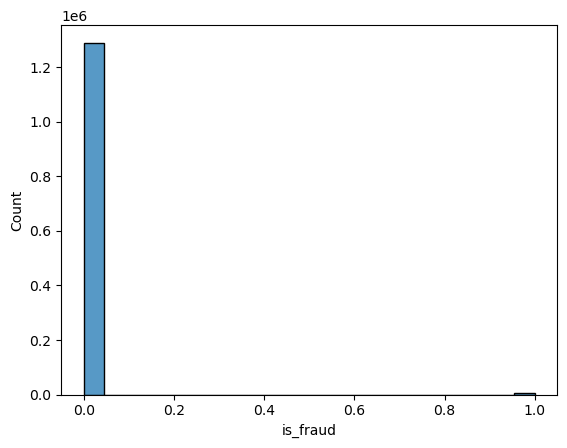

In [72]:
sns.histplot(x="is_fraud",data=df)

In [73]:
df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [74]:
# Fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Non-fraud transactions (is_fraud == 0)
non_fraud_df = df[df['is_fraud'] == 0]

# Non-fraud rows ko fraud rows ke barabar random select karna
balanced_non_fraud_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Ab fraud aur balanced non-fraud rows ko concatenate karna
df = pd.concat([fraud_df, balanced_non_fraud_df])





<Axes: xlabel='is_fraud', ylabel='Count'>

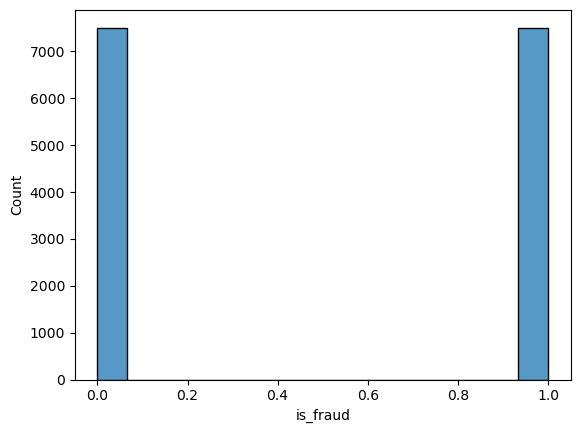

In [75]:
sns.histplot(x="is_fraud",data=df)

In [76]:
df.shape

(15012, 23)

In [77]:
df["is_fraud"].value_counts()

is_fraud
1    7506
0    7506
Name: count, dtype: int64

In [78]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000
mean,6.365042e+05,4.145026e+17,299.517998,48731.356248,38.620164,-90.275251,9.051075e+04,1.348818e+09,38.612480,-90.275455,0.500000
std,3.873911e+05,1.301544e+18,373.915804,27126.671123,5.128513,14.084930,3.035544e+05,1.332573e+07,5.168227,14.105491,0.500017
min,5.500000e+02,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325402e+09,19.041880,-166.550779,0.000000
25%,2.839260e+05,1.800400e+14,20.497500,25442.000000,34.778900,-96.983700,7.430000e+02,1.337471e+09,34.896843,-96.989761,0.000000
50%,6.382690e+05,3.523898e+15,89.545000,47869.000000,39.405500,-87.410100,2.526000e+03,1.348876e+09,39.403182,-87.360104,0.500000
75%,9.813065e+05,4.642255e+15,477.102500,72042.000000,42.015800,-80.128400,2.112500e+04,1.359844e+09,41.991035,-80.168734,1.000000
max,1.296552e+06,4.992346e+18,6337.250000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371813e+09,67.510267,-67.027467,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  cit

In [80]:
df.isnull().sum()/len(df)*100

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [81]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  cit

In [83]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_time'] = df['trans_date_trans_time'].dt.time


In [84]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_date,transaction_time
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,03:05:23
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019-01-02,03:38:03
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019-01-02,03:55:47


In [85]:
df['year'] = pd.to_datetime(df['transaction_date']).dt.year
df['month'] = pd.to_datetime(df['transaction_date']).dt.month
df['day'] = pd.to_datetime(df['transaction_date']).dt.day

In [86]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


df['dob_year'] = df['dob'].dt.year
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.day

In [87]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_date,transaction_time,year,month,day,dob_year,dob_month,dob_day
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37,2019,1,2,1988,9,15
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29,2019,1,2,1960,10,28
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,03:05:23,2019,1,2,1960,10,28


In [88]:
df['hour'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.hour
df['minute'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.minute
df['second'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.second

In [89]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_date,transaction_time,year,month,day,dob_year,dob_month,dob_day,hour,minute,second
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37,2019,1,2,1988,9,15,1,6,37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29,2019,1,2,1960,10,28,1,47,29
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,03:05:23,2019,1,2,1960,10,28,3,5,23


In [90]:
# Rename columns
df.rename(columns={

    "cc_num": "credit_card_number",
    "merchant": "merchant_name",
    "category": "merchant_category",
    "amt": "transaction_amount",
    "first": "first_name",
    "last": "last_name",
    "gender": "customer_gender",
    "city": "customer_city",
    "state": "customer_state",
    "zip": "zipcode",
    "lat": "customer_latitude",
    "long": "customer_longitude",
    "city_pop": "city_population",
    "job": "customer_job",
    "trans_num": "transaction_id",
    "unix_time": "transaction_unix_time",
    "merch_lat": "merchant_latitude",
    "merch_long": "merchant_longitude",
    "is_fraud": "fraud_status",
    "transaction_date":"transaction_dates",
    "year": "transaction_year",
    "month": "transaction_month",
    "day": "transaction_date",
    "hour": "transaction_hour",
    "minute": "transaction_minute",
    "second": "transaction_second",
    "dob_year": "date_of_birth_year",
    "dob_month": "date_of_birth_month",
    "dob_day": "date_of_birth_day"
}, inplace=True)

In [91]:
df.head()

,Unnamed: 0,trans_date_trans_time,credit_card_number,merchant_name,merchant_category,transaction_amount,first_name,last_name,customer_gender,street,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,dob,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_dates,transaction_time,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37,2019,1,2,1988,9,15,1,6,37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29,2019,1,2,1960,10,28,1,47,29
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,03:05:23,2019,1,2,1960,10,28,3,5,23
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019-01-02,03:38:03,2019,1,2,1988,9,15,3,38,3
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019-01-02,03:55:47,2019,1,2,1960,10,28,3,55,47


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15012 non-null  int64         
 1   trans_date_trans_time  15012 non-null  datetime64[ns]
 2   credit_card_number     15012 non-null  int64         
 3   merchant_name          15012 non-null  object        
 4   merchant_category      15012 non-null  object        
 5   transaction_amount     15012 non-null  float64       
 6   first_name             15012 non-null  object        
 7   last_name              15012 non-null  object        
 8   customer_gender        15012 non-null  object        
 9   street                 15012 non-null  object        
 10  customer_city          15012 non-null  object        
 11  customer_state         15012 non-null  object        
 12  zipcode                15012 non-null  int64         
 13  cu

In [93]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
credit_card_number       0
merchant_name            0
merchant_category        0
transaction_amount       0
first_name               0
last_name                0
customer_gender          0
street                   0
customer_city            0
customer_state           0
zipcode                  0
customer_latitude        0
customer_longitude       0
city_population          0
customer_job             0
dob                      0
transaction_id           0
transaction_unix_time    0
merchant_latitude        0
merchant_longitude       0
fraud_status             0
transaction_dates        0
transaction_time         0
transaction_year         0
transaction_month        0
transaction_date         0
date_of_birth_year       0
date_of_birth_month      0
date_of_birth_day        0
transaction_hour         0
transaction_minute       0
transaction_second       0
dtype: int64

In [94]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,credit_card_number,merchant_name,merchant_category,transaction_amount,first_name,last_name,customer_gender,street,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,dob,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_dates,transaction_time,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37,2019,1,2,1988,9,15,1,6,37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29,2019,1,2,1960,10,28,1,47,29
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,03:05:23,2019,1,2,1960,10,28,3,5,23
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019-01-02,03:38:03,2019,1,2,1988,9,15,3,38,3


In [95]:
df.drop(columns=["trans_date_trans_time","dob","first_name","last_name","Unnamed: 0","street","transaction_dates","transaction_time"],inplace=True)

In [96]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29


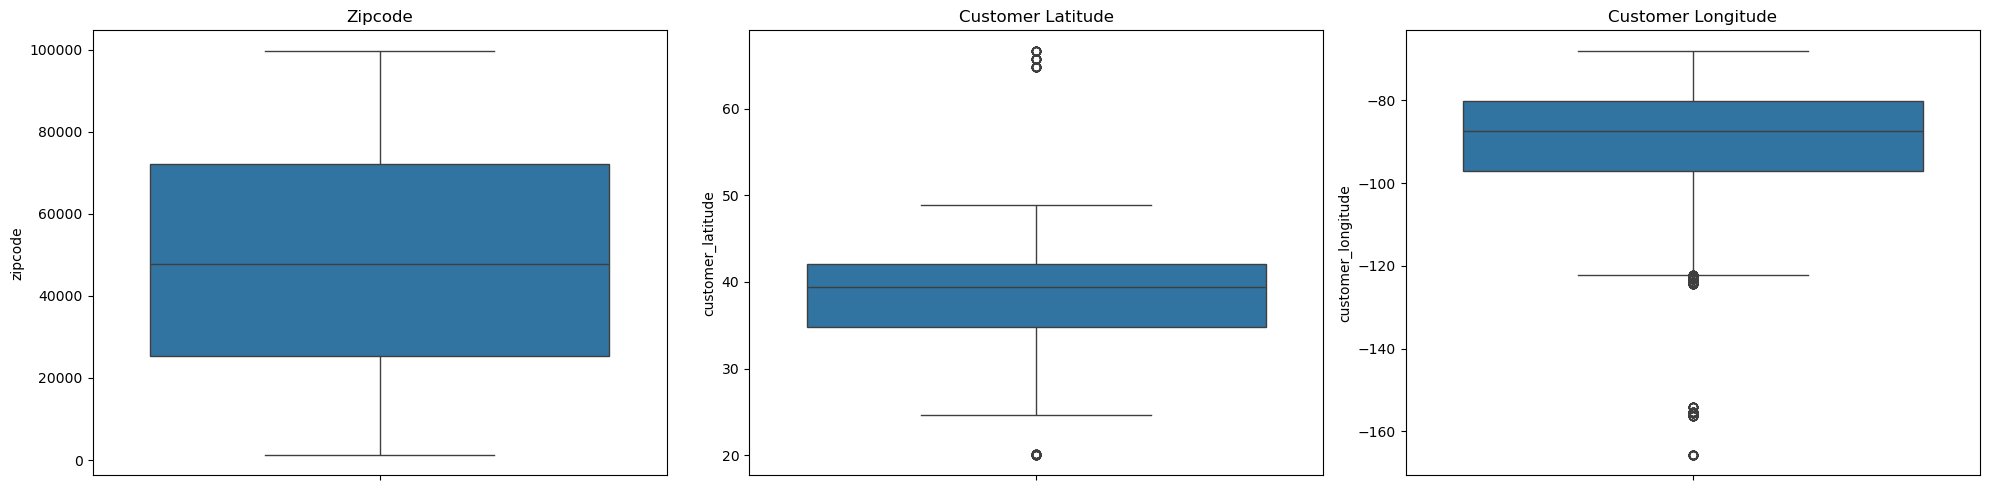

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(df["zipcode"], ax=axes[0]).set(title="Zipcode")
sns.boxplot(df["customer_latitude"], ax=axes[1]).set(title="Customer Latitude")
sns.boxplot(df["customer_longitude"], ax=axes[2]).set(title="Customer Longitude")


plt.tight_layout()
plt.show()


In [98]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_latitude'].quantile(0.25)
Q3 = df['customer_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_latitude'] = df['customer_latitude'].clip(upper=upper_bound,lower=lower_bound)

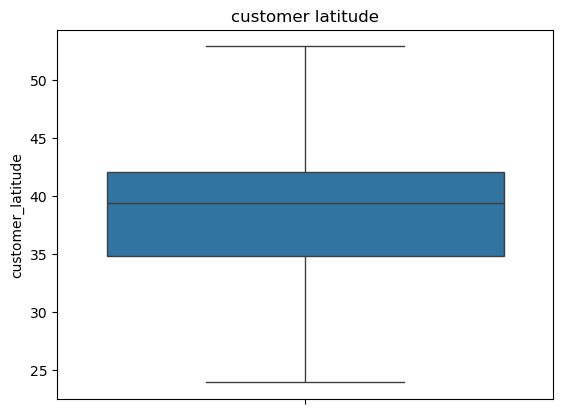

In [99]:
sns.boxplot(df["customer_latitude"])
plt.title("customer latitude")
plt.show()

In [100]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_longitude'].quantile(0.25)
Q3 = df['customer_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_longitude'] = df['customer_longitude'].clip(upper=upper_bound,lower=lower_bound)

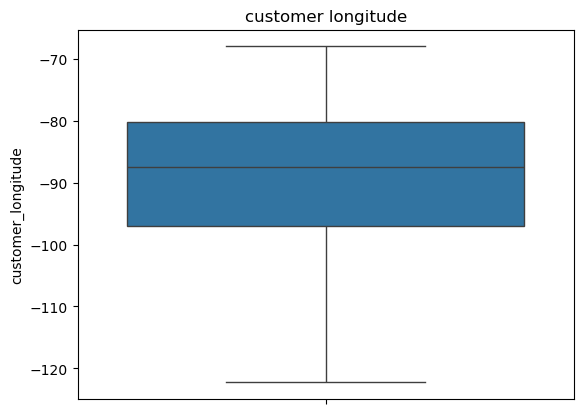

In [101]:
sns.boxplot(df["customer_longitude"])
plt.title("customer longitude")
plt.show()

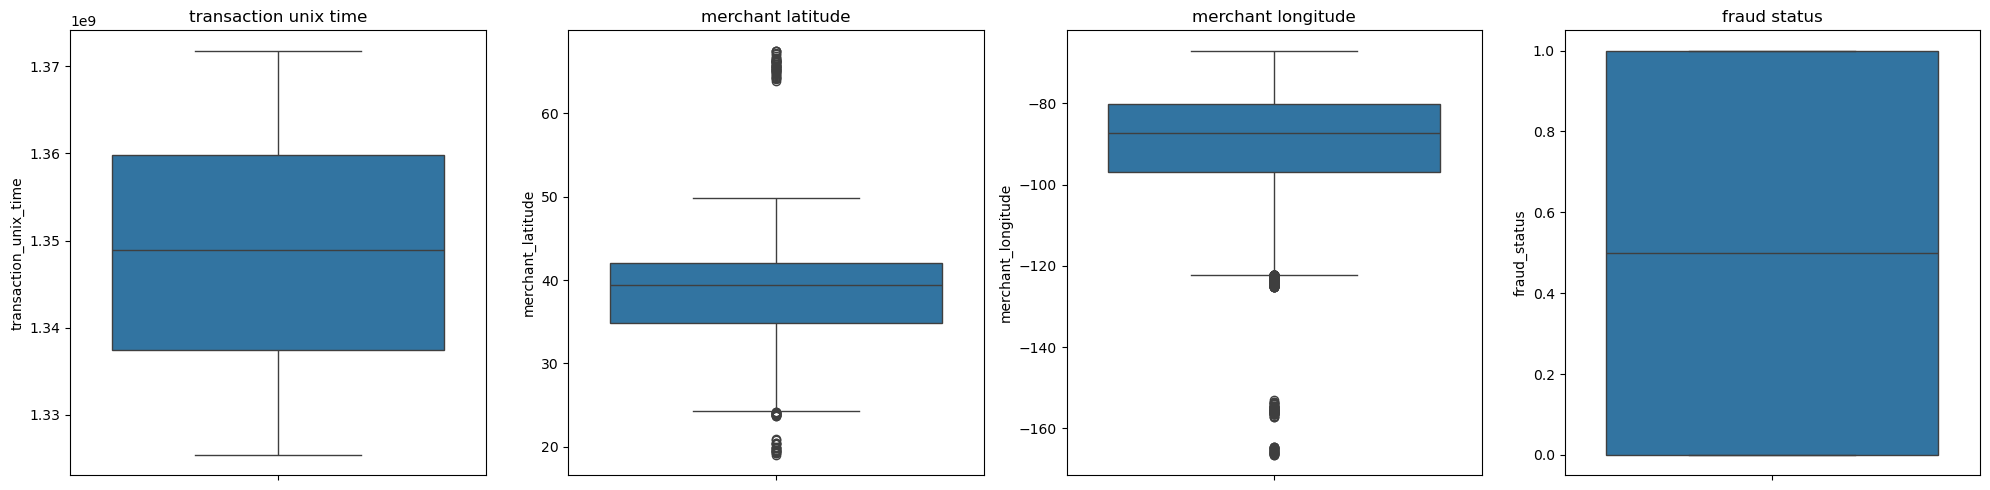

In [102]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(df["transaction_unix_time"], ax=axes[0]).set(title="transaction unix time")
sns.boxplot(df["merchant_latitude"], ax=axes[1]).set(title="merchant latitude")
sns.boxplot(df["merchant_longitude"], ax=axes[2]).set(title="merchant longitude")
sns.boxplot(df["fraud_status"], ax=axes[3]).set(title="fraud status")

plt.tight_layout()
plt.show()

In [103]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_latitude'].quantile(0.25)
Q3 = df['merchant_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_latitude'] = df['merchant_latitude'].clip(upper=upper_bound,lower=lower_bound)

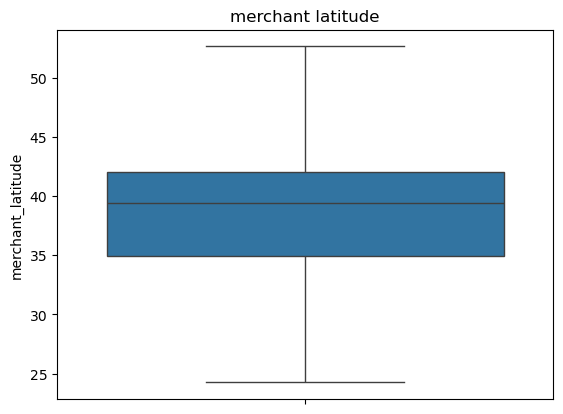

In [104]:
sns.boxplot(df["merchant_latitude"])
plt.title("merchant latitude")
plt.show()

In [105]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_longitude'].quantile(0.25)
Q3 = df['merchant_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_longitude'] = df['merchant_longitude'].clip(upper=upper_bound,lower=lower_bound)

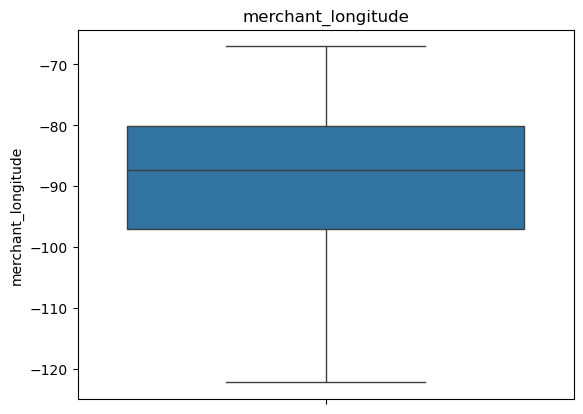

In [106]:
sns.boxplot(df["merchant_longitude"])
plt.title("merchant_longitude")
plt.show()

# Univariant

# Merchant Category Distribution

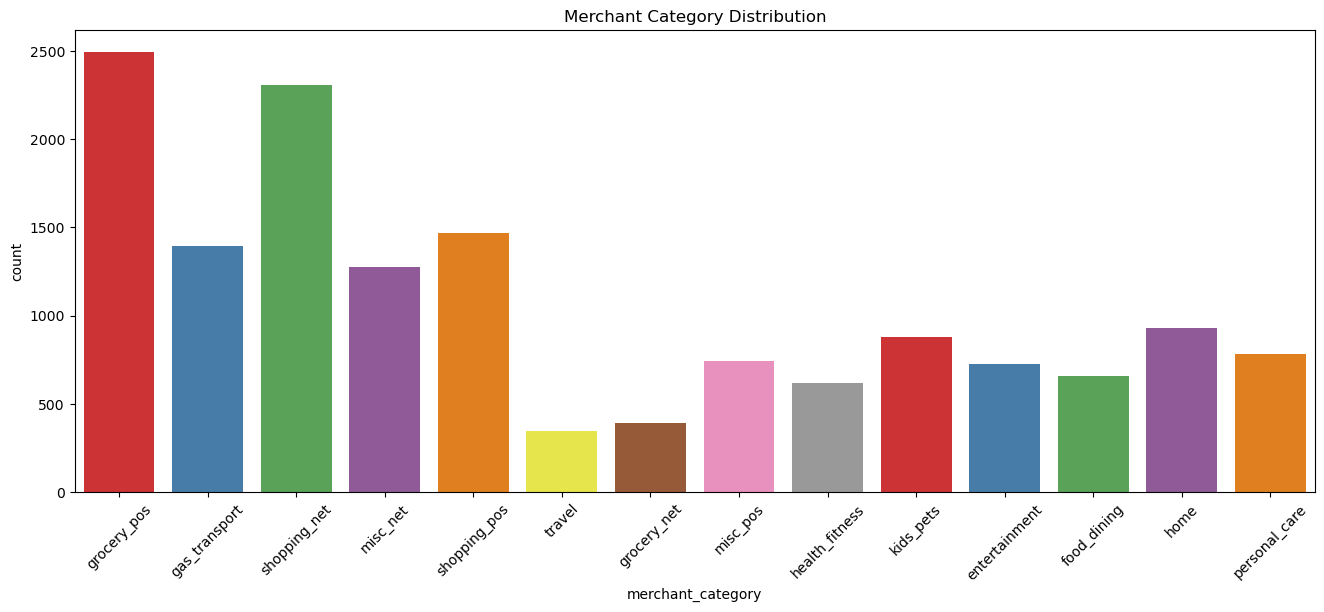

In [107]:
plt.figure(figsize=(16,6))
sns.countplot(x='merchant_category', data=df,palette="Set1")
plt.title("Merchant Category Distribution")
plt.xticks(rotation=45)
plt.show()


# Top 10 Customer Jobs

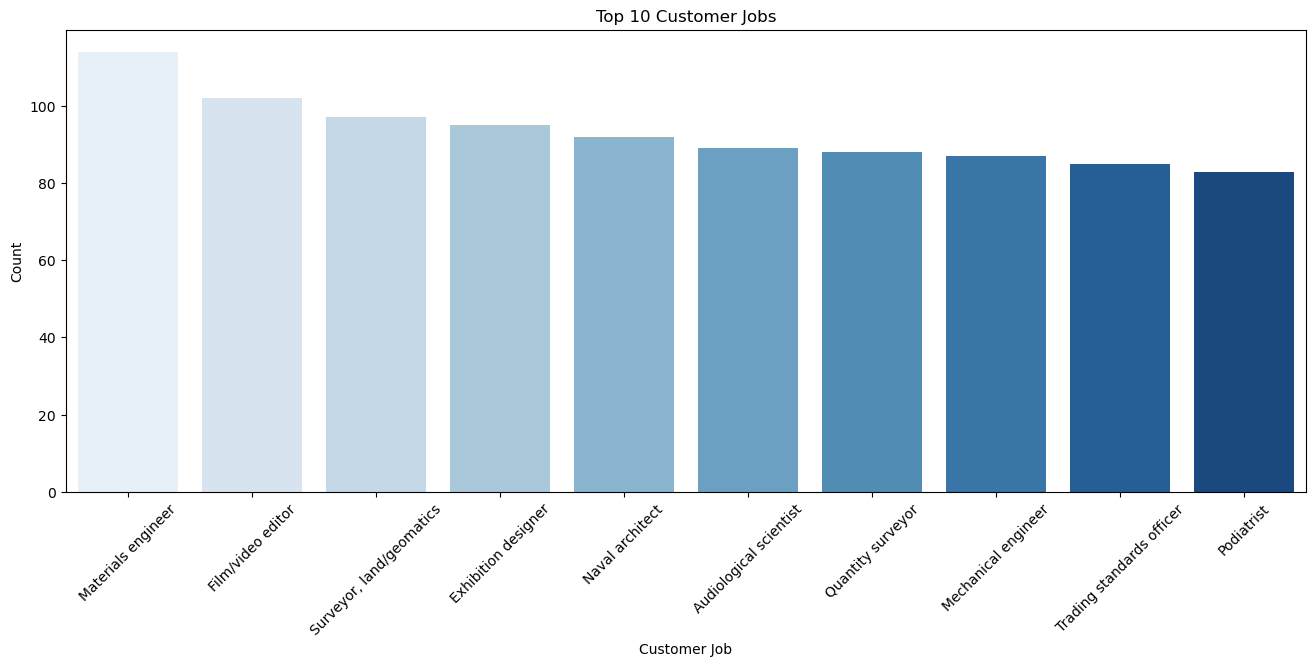

In [108]:
plt.figure(figsize=(16,6))
top_jobs = df['customer_job'].value_counts().nlargest(10) 
sns.barplot(x=top_jobs.index, y=top_jobs.values,palette="Blues")
plt.title("Top 10 Customer Jobs")
plt.xticks(rotation=45)
plt.xlabel("Customer Job")
plt.ylabel("Count")
plt.show()


# Customer state Distribution

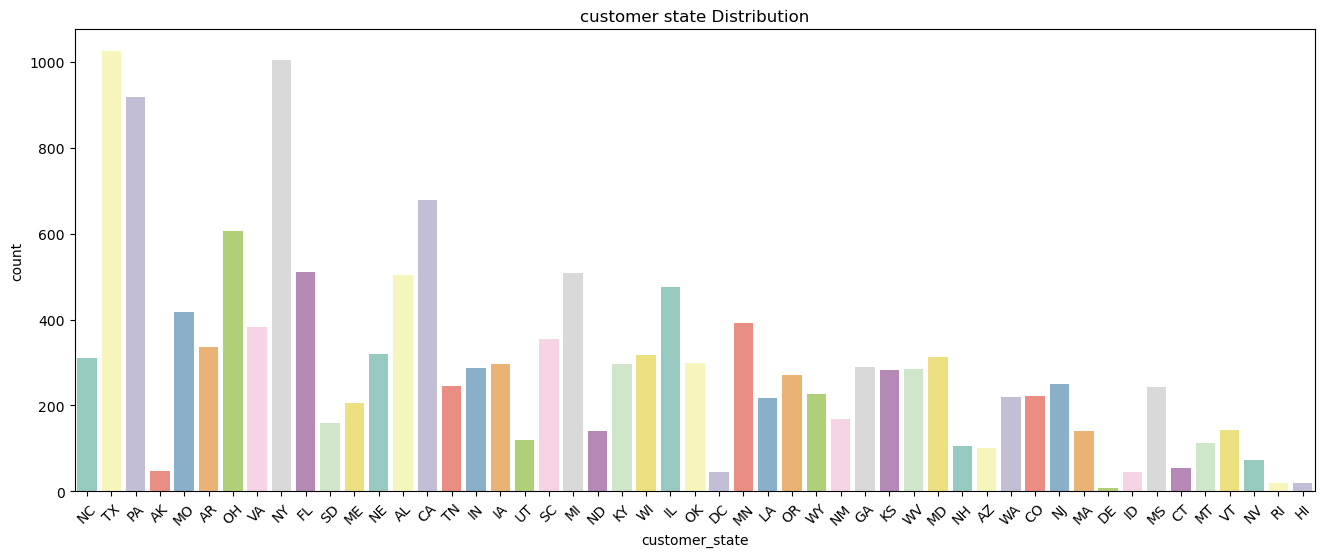

In [109]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_state', data=df,palette="Set3")
plt.title("customer state Distribution")
plt.xticks(rotation=45)
plt.show()


# Distribution of Transaction Amount

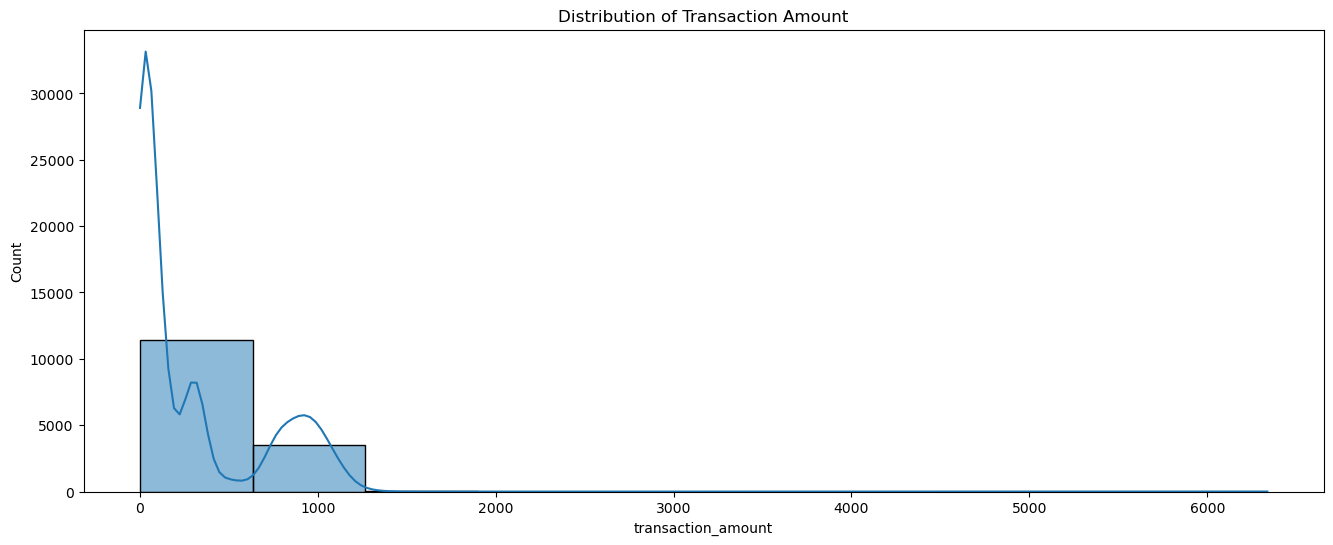

In [110]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_amount'], kde=True, bins=10)
plt.title("Distribution of Transaction Amount")
plt.show()


# Gender Distribution

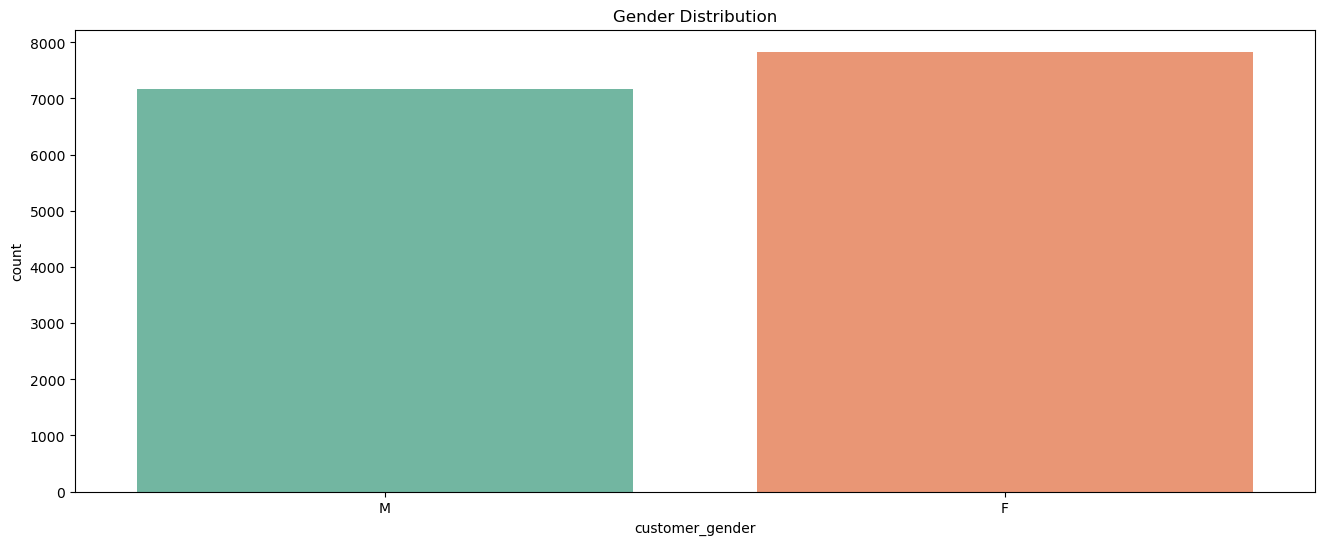

In [111]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_gender', data=df,palette="Set2")
plt.title("Gender Distribution")
plt.show()

# Distribution of Fraud vs Non-Fraud Transactions

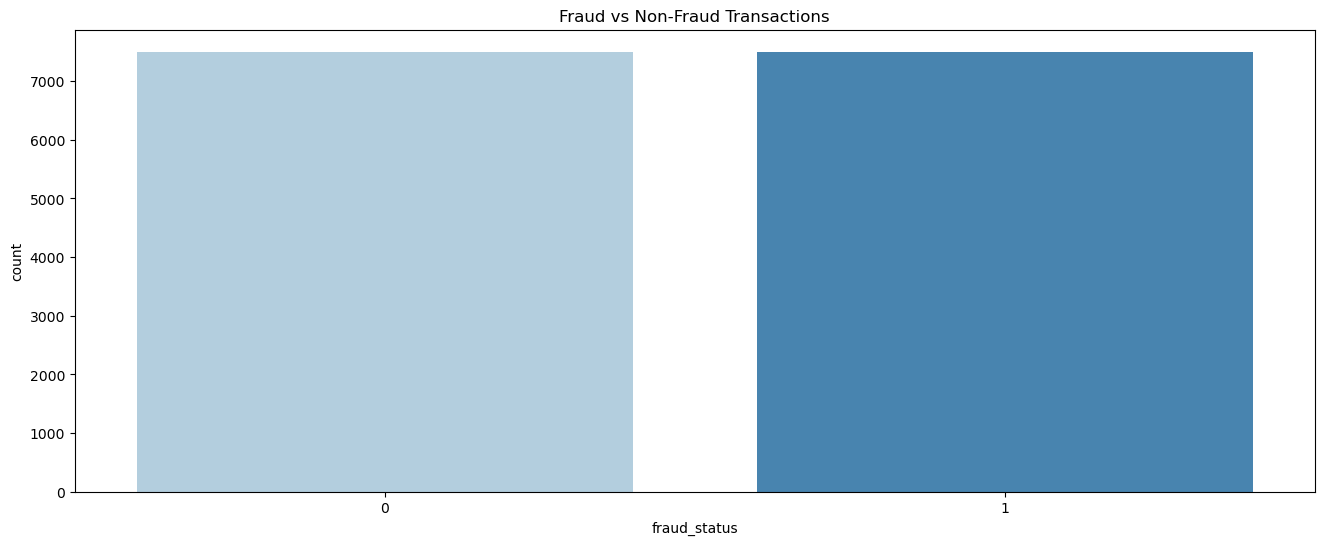

In [112]:
plt.figure(figsize=(16,6))
sns.countplot(x='fraud_status', data=df,palette="Blues")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Transaction Hours Distribution

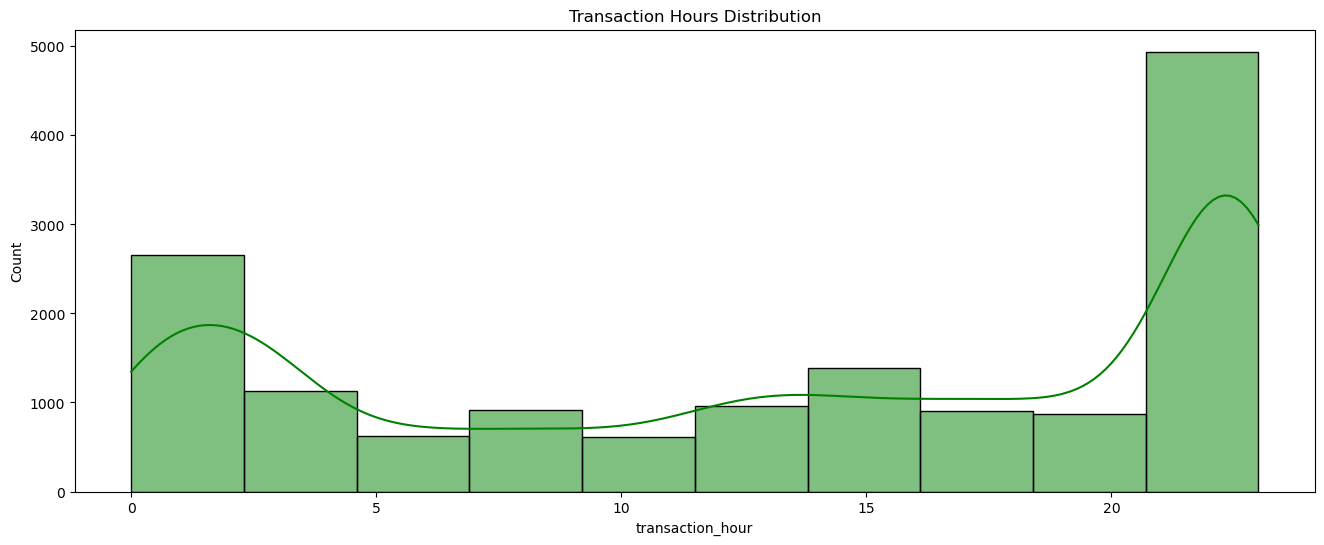

In [113]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_hour'], kde=True, bins=10,color="g")
plt.title("Transaction Hours Distribution")
plt.show()

# Transaction year Distribution

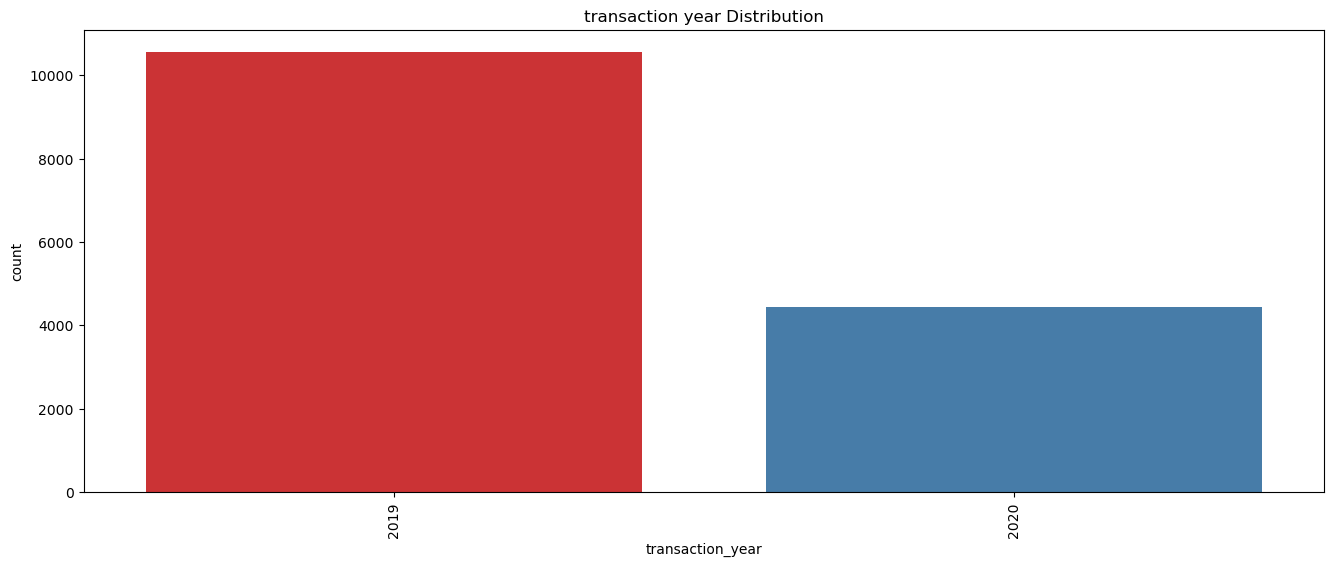

In [114]:
plt.figure(figsize=(16,6))
sns.countplot(x='transaction_year', data=df,palette="Set1")
plt.title("transaction year Distribution")
plt.xticks(rotation=90)
plt.show()

# Bivariant

In [115]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29


# Top 5 Merchants with Most Fraud Cases

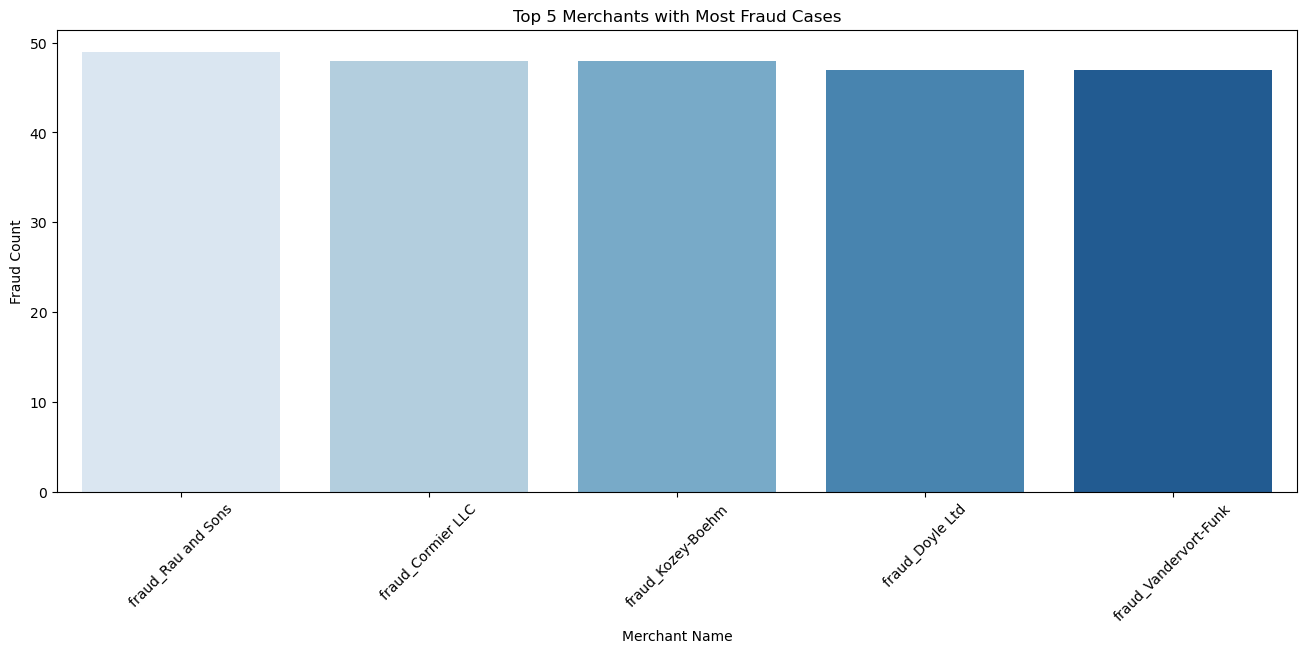

In [116]:
top_merchants = df[df["fraud_status"] == 1]["merchant_name"].value_counts().nlargest(5)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values,palette="Blues")
plt.title("Top 5 Merchants with Most Fraud Cases")
plt.xlabel("Merchant Name")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


# Fraud vs Customer Gender

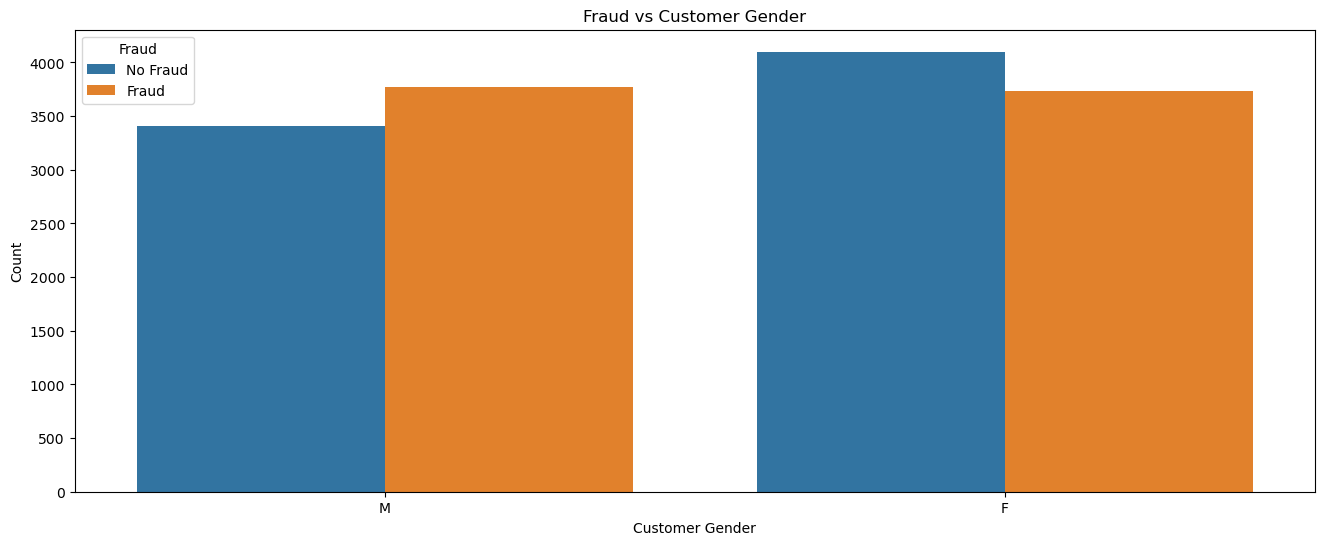

In [117]:
plt.figure(figsize=(16, 6))

# Create a count plot to visualize fraud vs customer gender
sns.countplot(data=df, x='customer_gender', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Customer Jobs Associated with Fraud

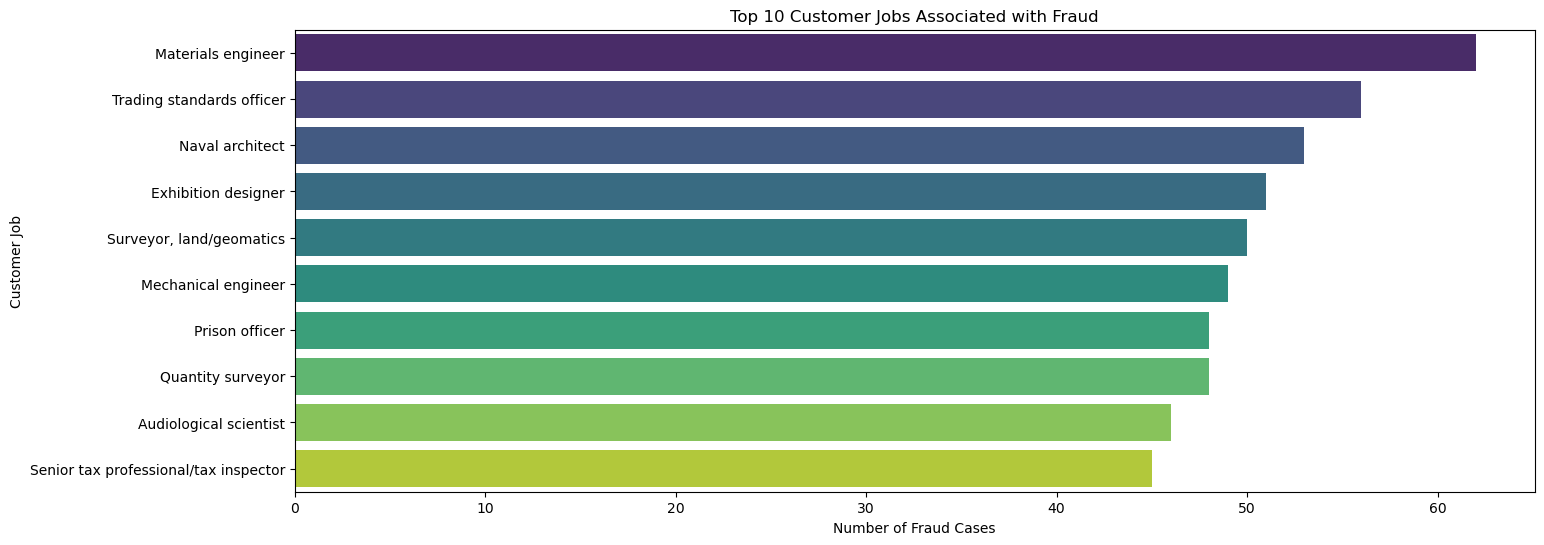

In [118]:
# Filter data for fraud cases (fraud_status = 1)
fraud_data = df[df['fraud_status'] == 1]

# Count the top 10 jobs associated with fraud
top_10_jobs = fraud_data['customer_job'].value_counts().head(10)

# Create a bar plot to visualize the top 10 jobs associated with fraud
plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Customer Jobs Associated with Fraud')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Customer Job')

# Show the plot
plt.show()

# Fraud vs customer state

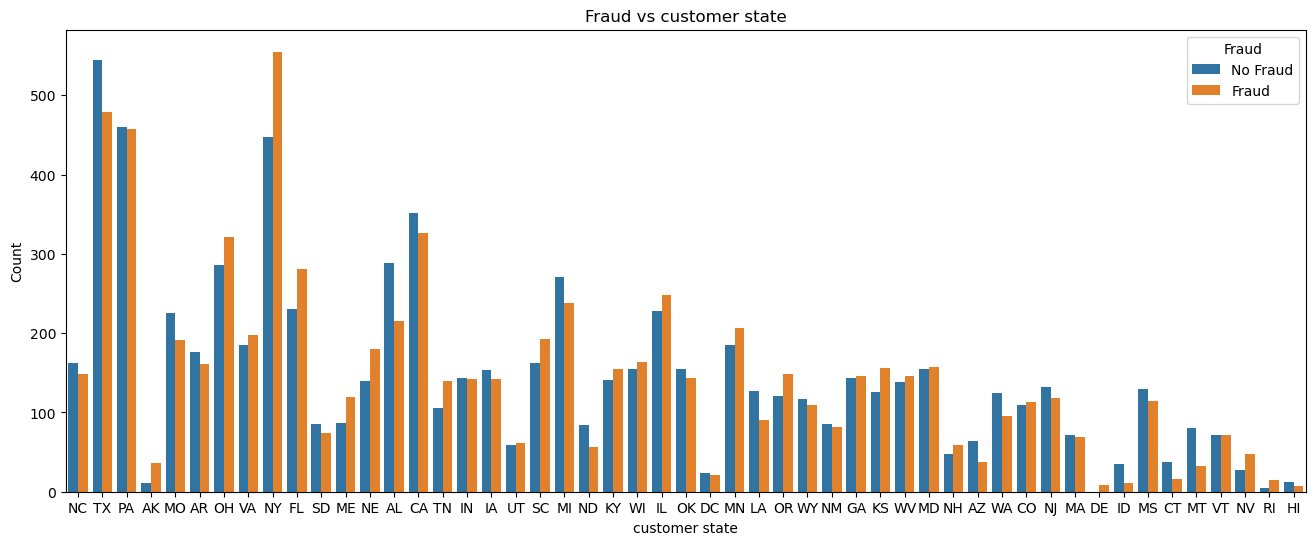

In [119]:
plt.figure(figsize=(16, 6))


sns.countplot(data=df, x='customer_state', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs customer state')
plt.xlabel('customer state')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Cities with Highest Fraud Cases

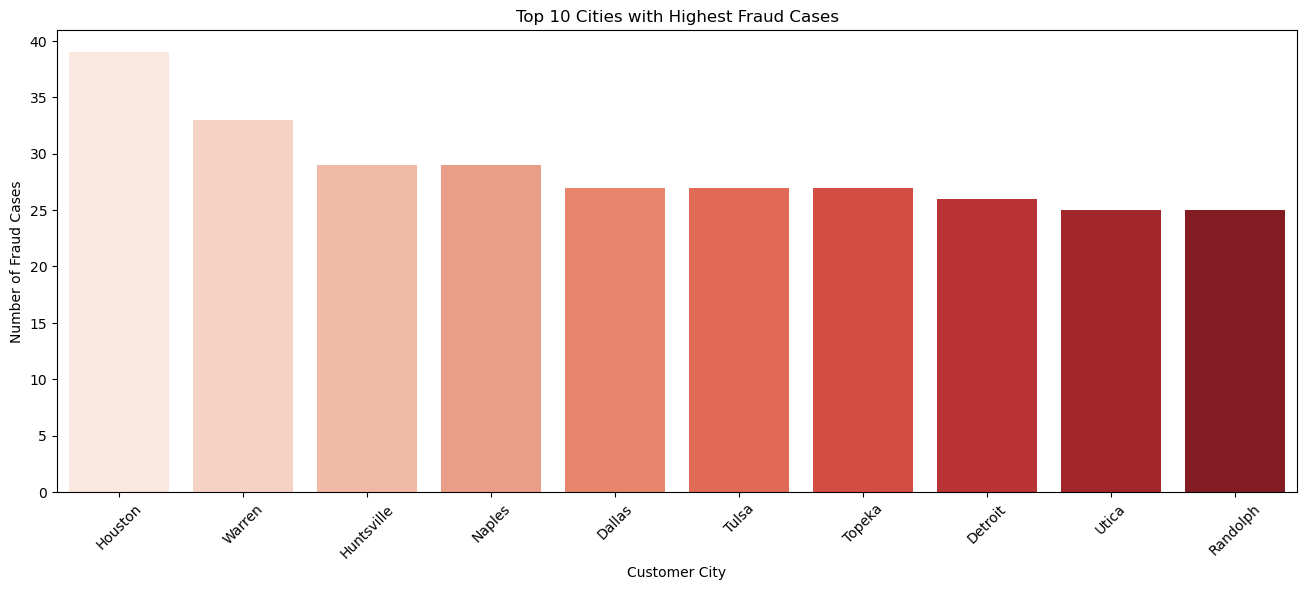

In [120]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'transaction_amount']]

# Plot the top 10 cities with the highest fraud cases
plt.figure(figsize=(16, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Reds')

# Add title and labels
plt.title('Top 10 Cities with Highest Fraud Cases')
plt.xlabel('Customer City')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Multivariant

In [121]:
df.head(3)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23


# Fraud Cases by City, Gender, and Transaction Amount

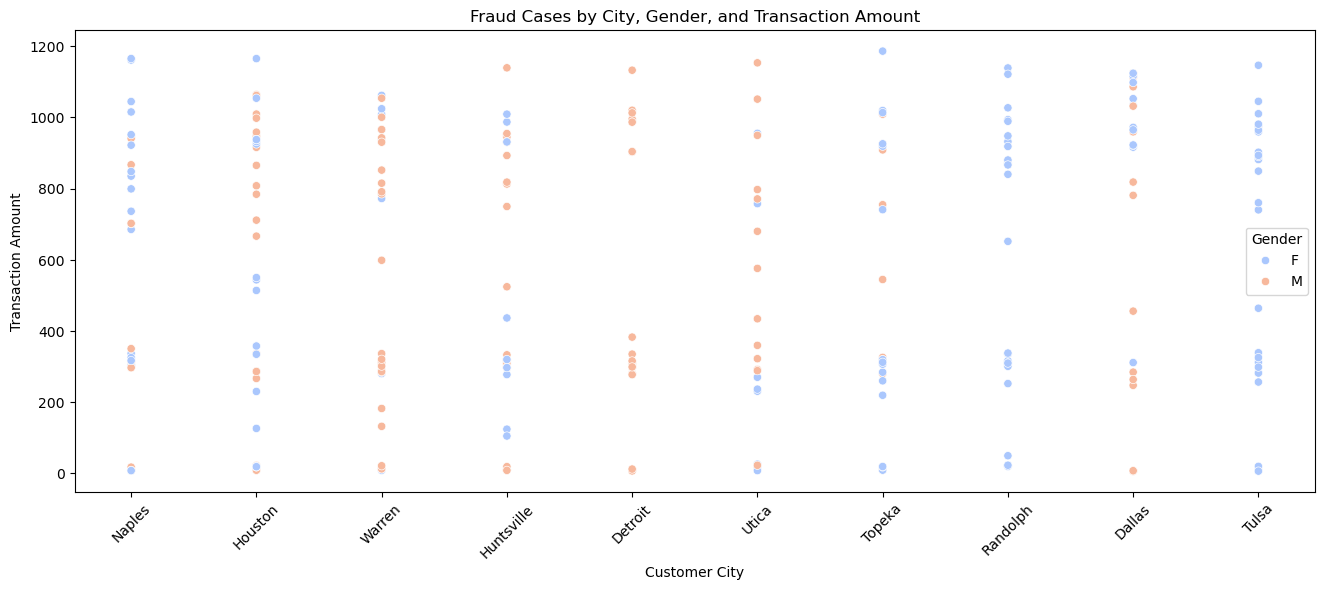

Top 10 Customers with Highest Fraud Transaction Amounts:
         customer_city customer_state  transaction_amount customer_gender
1262544     Queen Anne             MD             1376.04               F
514148           Tekoa             WA             1371.81               M
30239    Edisto Island             SC             1334.07               F
1258483     Queen Anne             MD             1324.80               F
821435      Karns City             PA             1313.18               F
1258594     Queen Anne             MD             1312.98               F
872879    Oconto Falls             WI             1294.83               M
75418          Hovland             MN             1292.21               M
531246          Dayton             OH             1289.89               F
878175      North East             PA             1289.07               F


In [122]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'customer_state', 'transaction_amount', 'customer_gender']]

# Plot fraud cases by city, gender, and transaction amount
plt.figure(figsize=(16, 6))
sns.scatterplot(data=fraud_df[fraud_df['customer_city'].isin(top_cities.index)], 
                x='customer_city', 
                y='transaction_amount', 
                hue='customer_gender', 
        
                palette='coolwarm',
                sizes=(20, 200))

# Add title and labels
plt.title('Fraud Cases by City, Gender, and Transaction Amount')
plt.xlabel('Customer City')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.show()

# Display top 10 customers with highest fraud amounts
print("Top 10 Customers with Highest Fraud Transaction Amounts:")
print(top_customers)


# Top 10 Fraud Status Counts by Merchant Name and Category

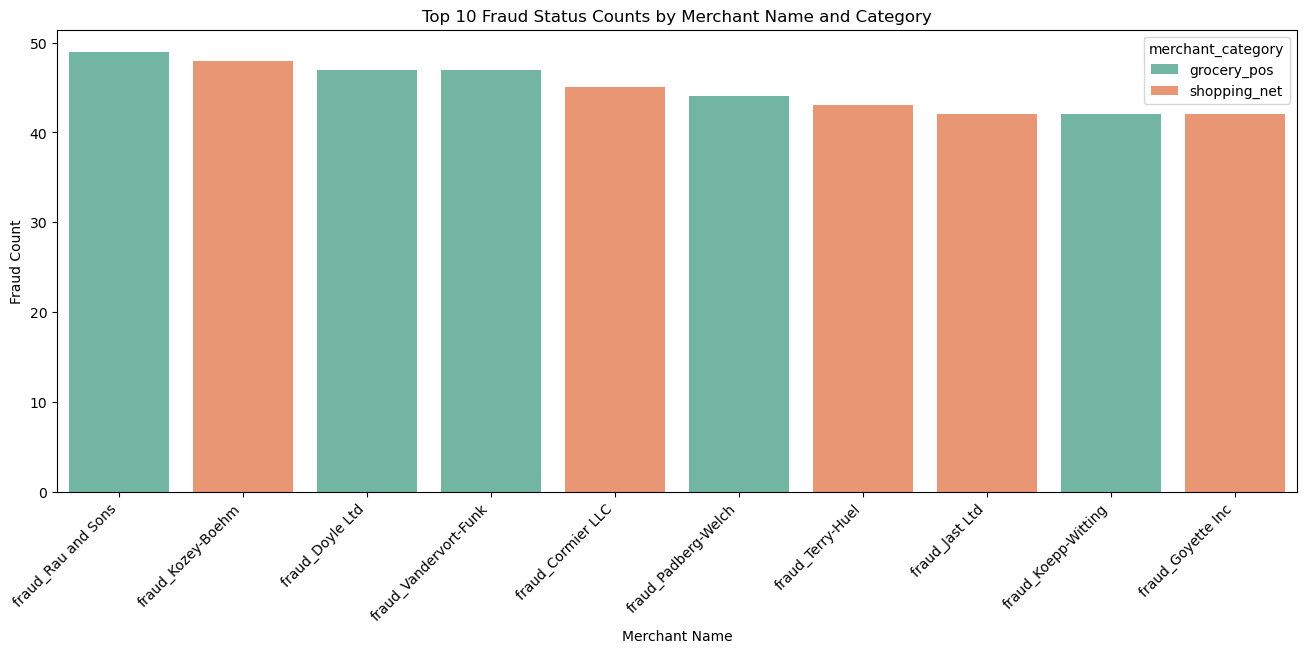

In [123]:
# Grouping by merchant name, category, and fraud status
fraud_counts = df.groupby(['merchant_name', 'merchant_category', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 merchants with highest fraud count
top_merchants = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_merchants, x='merchant_name', y='count', hue='merchant_category', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Merchant Name and Category')
plt.xlabel('Merchant Name')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Top 10 Fraud Status Counts by Customer City and State

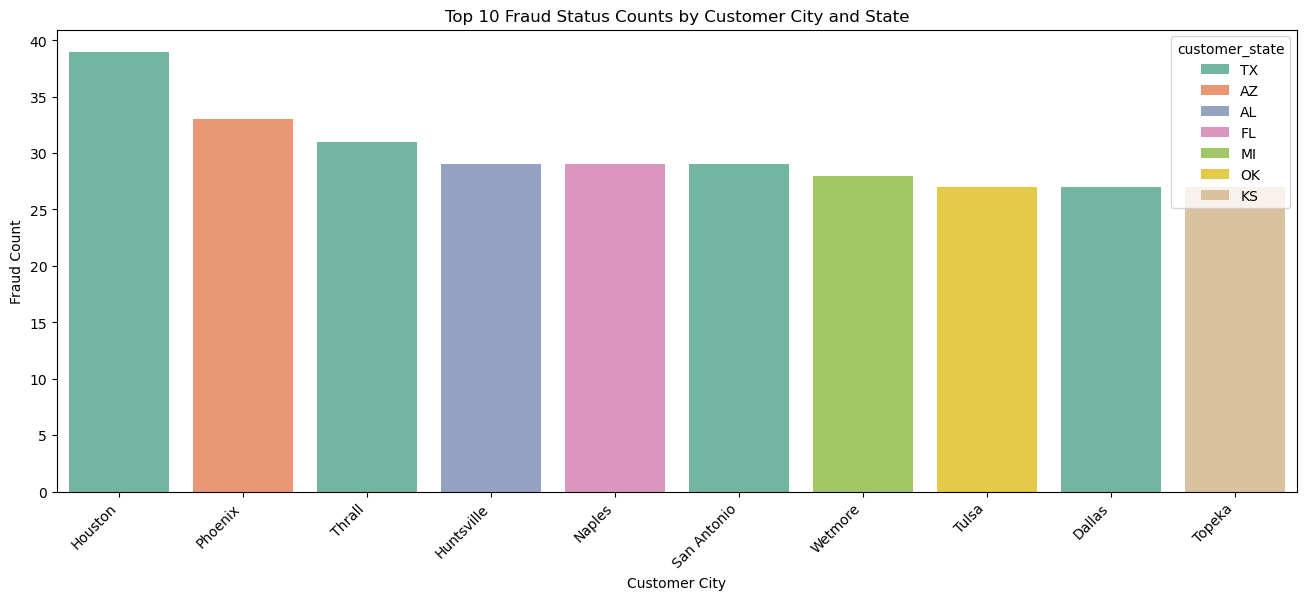

In [124]:
# Grouping by customer city, state, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_state', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 locations with highest fraud count
top_locations = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_locations, x='customer_city', y='count', hue='customer_state', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Customer City and State')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


In [125]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29


# Fraud Status Distribution by Customer State and Gender

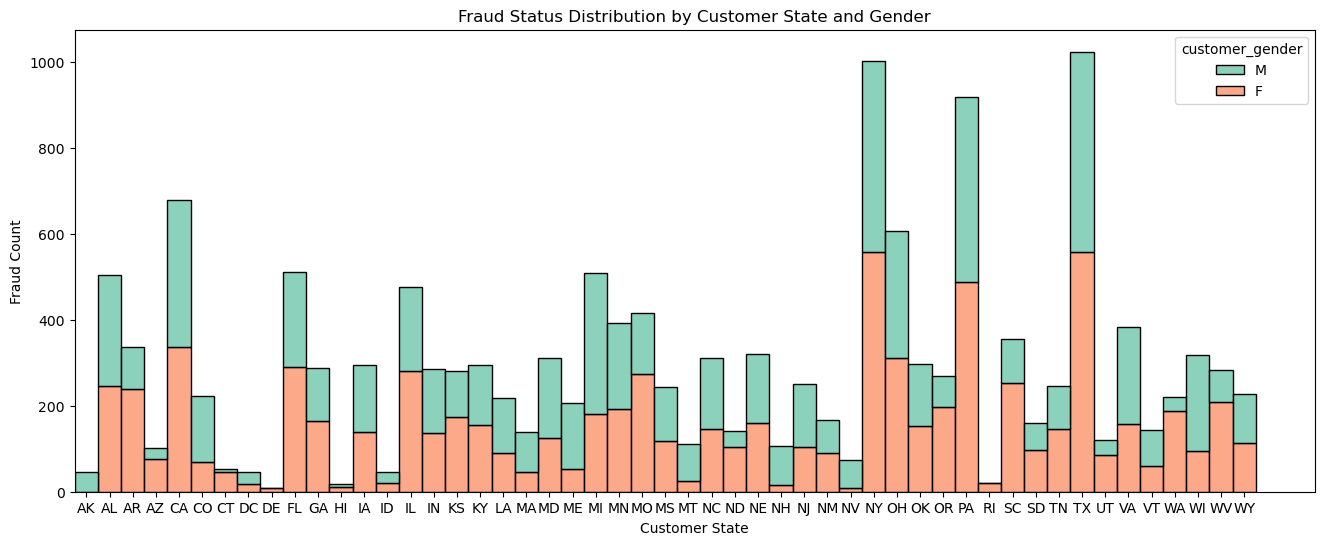

In [126]:
# Grouping by customer state, gender, and fraud status
fraud_counts = df.groupby(['customer_state', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Create a different type of plot (e.g., stacked bar chart)
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts, x='customer_state', weights='count', hue='customer_gender',  multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Customer State and Gender')
plt.xlabel('Customer State')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Fraud Status Distribution by Top 10 Customer Cities and Gender

Text(0, 0.5, 'Fraud Count')

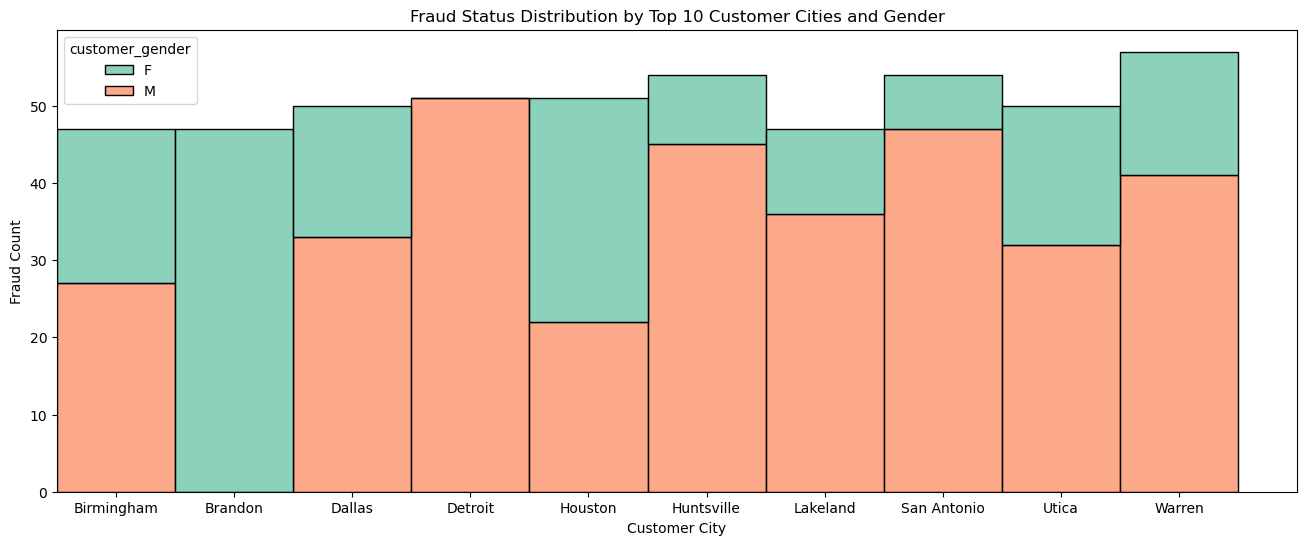

In [127]:
# Grouping by customer city, gender, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Calculate the total fraud count for each city
city_fraud_total = fraud_counts.groupby('customer_city')['count'].sum().reset_index()

# Sort and keep the top 10 cities based on total fraud count
top_cities = city_fraud_total.sort_values(by='count', ascending=False).head(10)['customer_city']

# Filter fraud_counts to only include the top 10 cities
fraud_counts_top_cities = fraud_counts[fraud_counts['customer_city'].isin(top_cities)]

# Create a stacked bar chart
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts_top_cities, x='customer_city', weights='count', hue='customer_gender', multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Top 10 Customer Cities and Gender')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')


#  Fraud Trend during transaction

In [128]:
# # Group by transaction year and fraud status
# fraud_by_year = df.groupby(['transaction_year', 'fraud_status']).size().reset_index(name='count')

# # Plot the trend
# fig = px.line(fraud_by_year, 
#               x='transaction_year', 
#               y='count', 
#               color='fraud_status', 
#               title='Fraud Trend by Transaction Year',
#               labels={'transaction_year': 'Transaction Year', 'count': 'Fraud Count'})

# fig.show()
#  # Group by transaction month and fraud status
# fraud_by_month = df.groupby(['transaction_month', 'fraud_status']).size().reset_index(name='count')

# # Plot the trend
# fig = px.line(fraud_by_month, 
#               x='transaction_month', 
#               y='count', 
#               color='fraud_status', 
#               title='Fraud Trend by Transaction Month',
#               labels={'transaction_month': 'Transaction Month', 'count': 'Fraud Count'})

# fig.show()
# # Group by transaction date (day) and fraud status
# fraud_by_date = df.groupby(['transaction_date', 'fraud_status']).size().reset_index(name='count')

# # Plot the trend
# fig = px.line(fraud_by_date, 
#               x='transaction_date', 
#               y='count', 
#               color='fraud_status', 
#               title='Fraud Trend by Transaction Date',
#               labels={'transaction_date': 'Transaction Date', 'count': 'Fraud Count'})

# fig.show()

# # Group by transaction hour and fraud status
# fraud_by_hour = df.groupby(['transaction_hour', 'fraud_status']).size().reset_index(name='count')

# # Plot the trend
# fig = px.line(fraud_by_hour, 
#               x='transaction_hour', 
#               y='count', 
#               color='fraud_status', 
#               title='Fraud Trend by Transaction Hour',
#               labels={'transaction_hour': 'Transaction Hour', 'count': 'Fraud Count'})

# fig.show()
# # Group by transaction minute and fraud status
# fraud_by_minute = df.groupby(['transaction_minute', 'fraud_status']).size().reset_index(name='count')

# # Plot the trend
# fig = px.line(fraud_by_minute, 
#               x='transaction_minute', 
#               y='count', 
#               color='fraud_status', 
#               title='Fraud Trend by Transaction Minute',
#               labels={'transaction_minute': 'Transaction Minute', 'count': 'Fraud Count'})

# fig.show()


In [129]:
# # import plotly.express as px

# # # Assuming your DataFrame is `df` and contains latitude, longitude, and fraud status

# # # Plotting the map with fraud status
# fig = px.scatter_geo(df, 
#                      lat='customer_latitude',  # Latitude column
#                      lon='customer_longitude', # Longitude column
#                      color='fraud_status',     # Fraud status for coloring the points
#                      hover_name='customer_city', # Display city on hover
#                      hover_data=['customer_state', 'fraud_status', 'transaction_amount'],  # Display more details on hover
#                      title='Customer Fraud Status Map',
#                      projection='natural earth',  # Use natural earth projection
#                      color_continuous_scale='Viridis'  # Choose color scale
# )

# # Change background color
# fig.update_layout(
#     paper_bgcolor='lightblue',  # Background color of the entire figure (behind the map)
#     plot_bgcolor='lightgray',   # Background color of the plot area (map itself)
# )

# # Show the map
# fig.show()


In [64]:


# # Assuming your DataFrame is `df` and contains the relevant columns
# # Group by Merchant Latitude, Merchant Longitude, and Fraud Status to get fraud count
# fraud_counts = df.groupby(['merchant_name', 'merchant_category', 'merchant_latitude', 'merchant_longitude', 'fraud_status']).size().reset_index(name='count')

# # Create a map using merchant latitude and longitude
# fig = px.scatter_geo(fraud_counts, 
#                      lat='merchant_latitude',       # Merchant Latitude
#                      lon='merchant_longitude',      # Merchant Longitude
#                      color='fraud_status',          # Color by fraud status
#                      size='count',                  # Size by fraud count
#                      hover_name='merchant_name',    # Hover to display merchant name
#                      hover_data=['merchant_category', 'count'], # Show more details on hover
#                      title='Fraud Status by Merchant Location (Latitude, Longitude)',
#                      labels={'merchant_name': 'Merchant Name', 
#                              'merchant_category': 'Merchant Category', 
#                              'count': 'Fraud Count'},
#                      color_continuous_scale='Viridis', # Color scale for fraud status
#                      projection='natural earth'  # Map projection type
# )

# # Change the background color
# fig.update_layout(
#     paper_bgcolor='lightblue',  # Background color of the entire figure (behind the map)
#     plot_bgcolor='lightgray',   # Background color of the plot area (map itself)
# )

# # Show the map
# fig.show()


In [130]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23
2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3
2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=["merchant_name","merchant_category","merchant_category","customer_city",""]

In [70]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.540743
2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3,0.485865
2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47,0.408014


In [71]:
df["customer_state"].unique()

array(['NC', 'TX', 'PA', 'AK', 'MO', 'AR', 'OH', 'VA', 'NY', 'FL', 'SD',
       'ME', 'NE', 'AL', 'CA', 'TN', 'IN', 'IA', 'UT', 'SC', 'MI', 'ND',
       'KY', 'WI', 'IL', 'OK', 'DC', 'MN', 'LA', 'OR', 'WY', 'NM', 'GA',
       'KS', 'WV', 'MD', 'NH', 'AZ', 'WA', 'CO', 'NJ', 'MA', 'DE', 'ID',
       'MS', 'CT', 'MT', 'VT', 'NV', 'RI', 'HI'], dtype=object)

In [72]:


# Apply Map Encoding
df['customer_state'] = df['customer_state'].map({
    'NC': 1, 'TX': 2, 'PA': 3, 'AK': 4, 'MO': 5, 'AR': 6, 'OH': 7, 'VA': 8, 'NY': 9, 'FL': 10, 'SD': 11,
    'ME': 12, 'NE': 13, 'AL': 14, 'CA': 15, 'TN': 16, 'IN': 17, 'IA': 18, 'UT': 19, 'SC': 20, 'MI': 21, 'ND': 22,
    'KY': 23, 'WI': 24, 'IL': 25, 'OK': 26, 'DC': 27, 'MN': 28, 'LA': 29, 'OR': 30, 'WY': 31, 'NM': 32, 'GA': 33,
    'KS': 34, 'WV': 35, 'MD': 36, 'NH': 37, 'AZ': 38, 'WA': 39, 'CO': 40, 'NJ': 41, 'MA': 42, 'DE': 43, 'ID': 44,
    'MS': 45, 'CT': 46, 'MT': 47, 'VT': 48, 'NV': 49, 'RI': 50, 'HI': 51
})




In [73]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.540743
2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3,0.485865
2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47,0.408014


In [74]:
df["merchant_category"].unique()

array(['grocery_pos', 'gas_transport', 'shopping_net', 'misc_net',
       'shopping_pos', 'travel', 'grocery_net', 'misc_pos',
       'health_fitness', 'kids_pets', 'entertainment', 'food_dining',
       'home', 'personal_care'], dtype=object)

In [75]:
df["merchant_category"]=df["merchant_category"].map({'grocery_pos':1, 'gas_transport':2, 'shopping_net':3, 'misc_net':4,
       'shopping_pos':5, 'travel':6, 'grocery_net':7, 'misc_pos':8,
       'health_fitness':9, 'kids_pets':10, 'entertainment':11, 'food_dining':12,
       'home':13, 'personal_care':14})

In [76]:
df["customer_gender"]=df["customer_gender"].map({'M':1,"F":0})

In [77]:
df.head(3)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,1,281.06,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",2,11.52,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336
2523,340187018810220,fraud_Goodwin-Nitzsche,1,276.31,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.540743


In [78]:
df["customer_city"].unique()

array(['Collettsville', 'San Antonio', 'Manor', 'Wales', 'Browning',
       'De Queen', 'Ironton', 'Manquin', 'Downsville', 'Naples', 'Fulton',
       'Nobleboro', 'Harborcreek', 'Cochranton', 'Ravenna', 'Oak Hill',
       'Mobile', 'San Jose', 'Moriches', 'Westerville', 'Heiskell',
       'Fayetteville', 'New Goshen', 'Parsonsfield', 'Mc Veytown',
       'Early', 'Thompson', 'Deadwood', 'Edisto Island', 'Oxford',
       'Hampton', 'Orangeburg', 'Rhame', 'Milford', 'Stephensport',
       'Sebring', 'Waukau', 'Parker Dam', 'Galatia',
       'Washington Court House', 'San Diego', 'Mountain Park', 'Houston',
       'Crouse', 'Centerview', 'Washington', 'Armagh', 'Vacaville',
       'Warren', 'Bigelow', 'Smock', 'Shields', 'Madisonville', 'Laredo',
       'Nazareth', 'Mount Morris', 'New Memphis', 'Cranks', 'Saxon',
       'La Grande', 'West Columbia', 'Port Costa', 'Meadville', 'Albany',
       'Greenport', 'Allentown', 'Alva', 'Wilmington', 'West Frankfort',
       'Hovland', 'Chattanoog

In [79]:

from sklearn.model_selection import KFold

df["customer_city_target_encoding"] = np.nan  # Initialize column

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **K-Fold Target Encoding**
for train_idx, val_idx in kf.split(df):
    X_train, X_val = df.iloc[train_idx], df.iloc[val_idx]
    encoding_map = X_train.groupby("customer_city")["fraud_status"].mean()
    
    # Map encoding, but if a city is missing, use NaN
    df.loc[df.index[val_idx], "customer_city_target_encoding"] = df.loc[df.index[val_idx], "customer_city"].map(encoding_map)

# **Fill NaN values with global fraud mean**
df["customer_city_target_encoding"].fillna(df["fraud_status"].mean(), inplace=True)

# **Smoothing Target Encoding**
global_mean = df["fraud_status"].mean()  # Overall fraud rate
customer_city_counts = df.groupby("customer_city")["fraud_status"].count()
customer_city_mean = df.groupby("customer_city")["fraud_status"].mean()

alpha = 10  # Regularization strength

df["customer_city_target_encoding"] = (customer_city_mean * customer_city_counts + global_mean * alpha) / (customer_city_counts + alpha)

# **Fill NaN values in case count = 0**
df["customer_city_target_encoding"].fillna(global_mean, inplace=True)

# **Add Random Noise to Reduce Overfitting**
df["customer_city_target_encoding"] += np.random.normal(0, 0.05, df.shape[0])  


In [80]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding,customer_city_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,1,281.06,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260,0.452613
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",2,11.52,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336,0.504272
2523,340187018810220,fraud_Goodwin-Nitzsche,1,276.31,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.540743,0.529932
2546,4613314721966,fraud_Erdman-Kertzmann,2,7.03,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3,0.485865,0.530822
2553,340187018810220,fraud_Koepp-Parker,1,275.73,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47,0.408014,0.535457


In [81]:
df["customer_job"].unique()

array(['Soil scientist', 'Horticultural consultant',
       'Public affairs consultant', 'Administrator, education',
       'Cytogeneticist', 'Scientist, biomedical', 'Geochemist',
       'Engineer, automotive', 'Psychotherapist, child',
       'Medical technical officer', 'Financial adviser',
       'Financial trader', 'Event organiser', 'Retail merchandiser',
       'Solicitor, Scotland', 'Glass blower/designer',
       'Surveyor, land/geomatics', 'Science writer',
       'Research officer, trade union', 'Product designer',
       'Geologist, wellsite', 'Scientist, research (maths)',
       'Engineer, mining', 'Audiological scientist',
       'Nutritional therapist', 'Pilot, airline', 'Surveyor, minerals',
       'Multimedia programmer', 'Sales professional, IT',
       'Agricultural consultant', 'Accounting technician',
       'Records manager', 'Illustrator', 'Hospital doctor',
       'Chartered public finance accountant', 'Environmental consultant',
       'Engineer, building serv

In [82]:


from sklearn.model_selection import KFold

# Initialize target encoding column
df["customer_job_target_encoding"] = np.nan  

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **K-Fold Target Encoding for customer_job**
for train_idx, val_idx in kf.split(df):
    X_train, X_val = df.iloc[train_idx], df.iloc[val_idx]
    
    job_encoding_map = X_train.groupby("customer_job")["fraud_status"].mean()
    
    df.loc[df.index[val_idx], "customer_job_target_encoding"] = df.loc[df.index[val_idx], "customer_job"].map(job_encoding_map)

# **Fill NaN values with global fraud mean**
global_mean = df["fraud_status"].mean()
df["customer_job_target_encoding"].fillna(global_mean, inplace=True)

# **Smoothing Target Encoding for customer_job**
customer_job_counts = df.groupby("customer_job")["fraud_status"].count()
customer_job_mean = df.groupby("customer_job")["fraud_status"].mean()

alpha = 10  # Regularization strength

df["customer_job_target_encoding"] = (customer_job_mean * customer_job_counts + global_mean * alpha) / (customer_job_counts + alpha)

# **Fill NaN values in case count = 0**
df["customer_job_target_encoding"].fillna(global_mean, inplace=True)

# **Add Random Noise to Reduce Overfitting**
df["customer_job_target_encoding"] += np.random.normal(0, 0.05, df.shape[0])  


In [83]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,1,281.06,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260,0.452613,0.565963
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",2,11.52,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336,0.504272,0.475075
2523,340187018810220,fraud_Goodwin-Nitzsche,1,276.31,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.540743,0.529932,0.486806
2546,4613314721966,fraud_Erdman-Kertzmann,2,7.03,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3,0.485865,0.530822,0.514391
2553,340187018810220,fraud_Koepp-Parker,1,275.73,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47,0.408014,0.535457,0.521256


In [84]:

# from sklearn.model_selection import KFold

# # Sample Data (Ensure df is defined with 'transaction_id' and 'fraud_status')
# # df = pd.read_csv("your_dataset.csv")  # Uncomment if reading from a file

# # Initialize target encoding column
# df["transaction_id_target_encoding"] = np.nan  

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # **K-Fold Target Encoding for transaction_id**
# for train_idx, val_idx in kf.split(df):
#     X_train, X_val = df.iloc[train_idx], df.iloc[val_idx]
    
#     transaction_encoding_map = X_train.groupby("transaction_id")["fraud_status"].mean().to_dict()
    
#     df.loc[df.index[val_idx], "transaction_id_target_encoding"] = df.loc[df.index[val_idx], "transaction_id"].map(transaction_encoding_map)

# # **Fill NaN values with global fraud mean**
# global_mean = df["fraud_status"].mean()
# df["transaction_id_target_encoding"].fillna(global_mean, inplace=True)

# # **Smoothing Target Encoding for transaction_id**
# transaction_counts = df.groupby("transaction_id")["fraud_status"].count()
# transaction_mean = df.groupby("transaction_id")["fraud_status"].mean()

# alpha = 10  # Regularization strength

# df["transaction_id_target_encoding"] = ((transaction_mean * transaction_counts + global_mean * alpha) /
#                                         (transaction_counts + alpha))

# # **Fill NaN values in case count = 0**
# df["transaction_id_target_encoding"].fillna(global_mean, inplace=True)

# # **Add Random Noise to Reduce Overfitting**
# df["transaction_id_target_encoding"] += np.random.normal(0, 0.05, df.shape[0])





In [85]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,4613314721966,fraud_Rutherford-Mertz,1,281.06,1,Collettsville,1,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.470260,0.452613,0.565963
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",2,11.52,0,San Antonio,2,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.528336,0.504272,0.475075


In [86]:
df.drop(columns={'credit_card_number','merchant_name','merchant_category','customer_city','customer_job','transaction_unix_time','transaction_id','zipcode','transaction_second'},inplace=True)

In [87]:
df.head()

,transaction_amount,customer_gender,customer_state,customer_latitude,customer_longitude,city_population,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,281.06,1,1,35.9946,-81.7266,885,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,0.470260,0.452613,0.565963
2472,11.52,0,2,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,0.528336,0.504272,0.475075
2523,276.31,0,2,29.4400,-98.4590,1595797,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,0.540743,0.529932,0.486806
2546,7.03,1,1,35.9946,-81.7266,885,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,0.485865,0.530822,0.514391
2553,275.73,0,2,29.4400,-98.4590,1595797,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,0.408014,0.535457,0.521256


In [88]:
corr=df.corr()

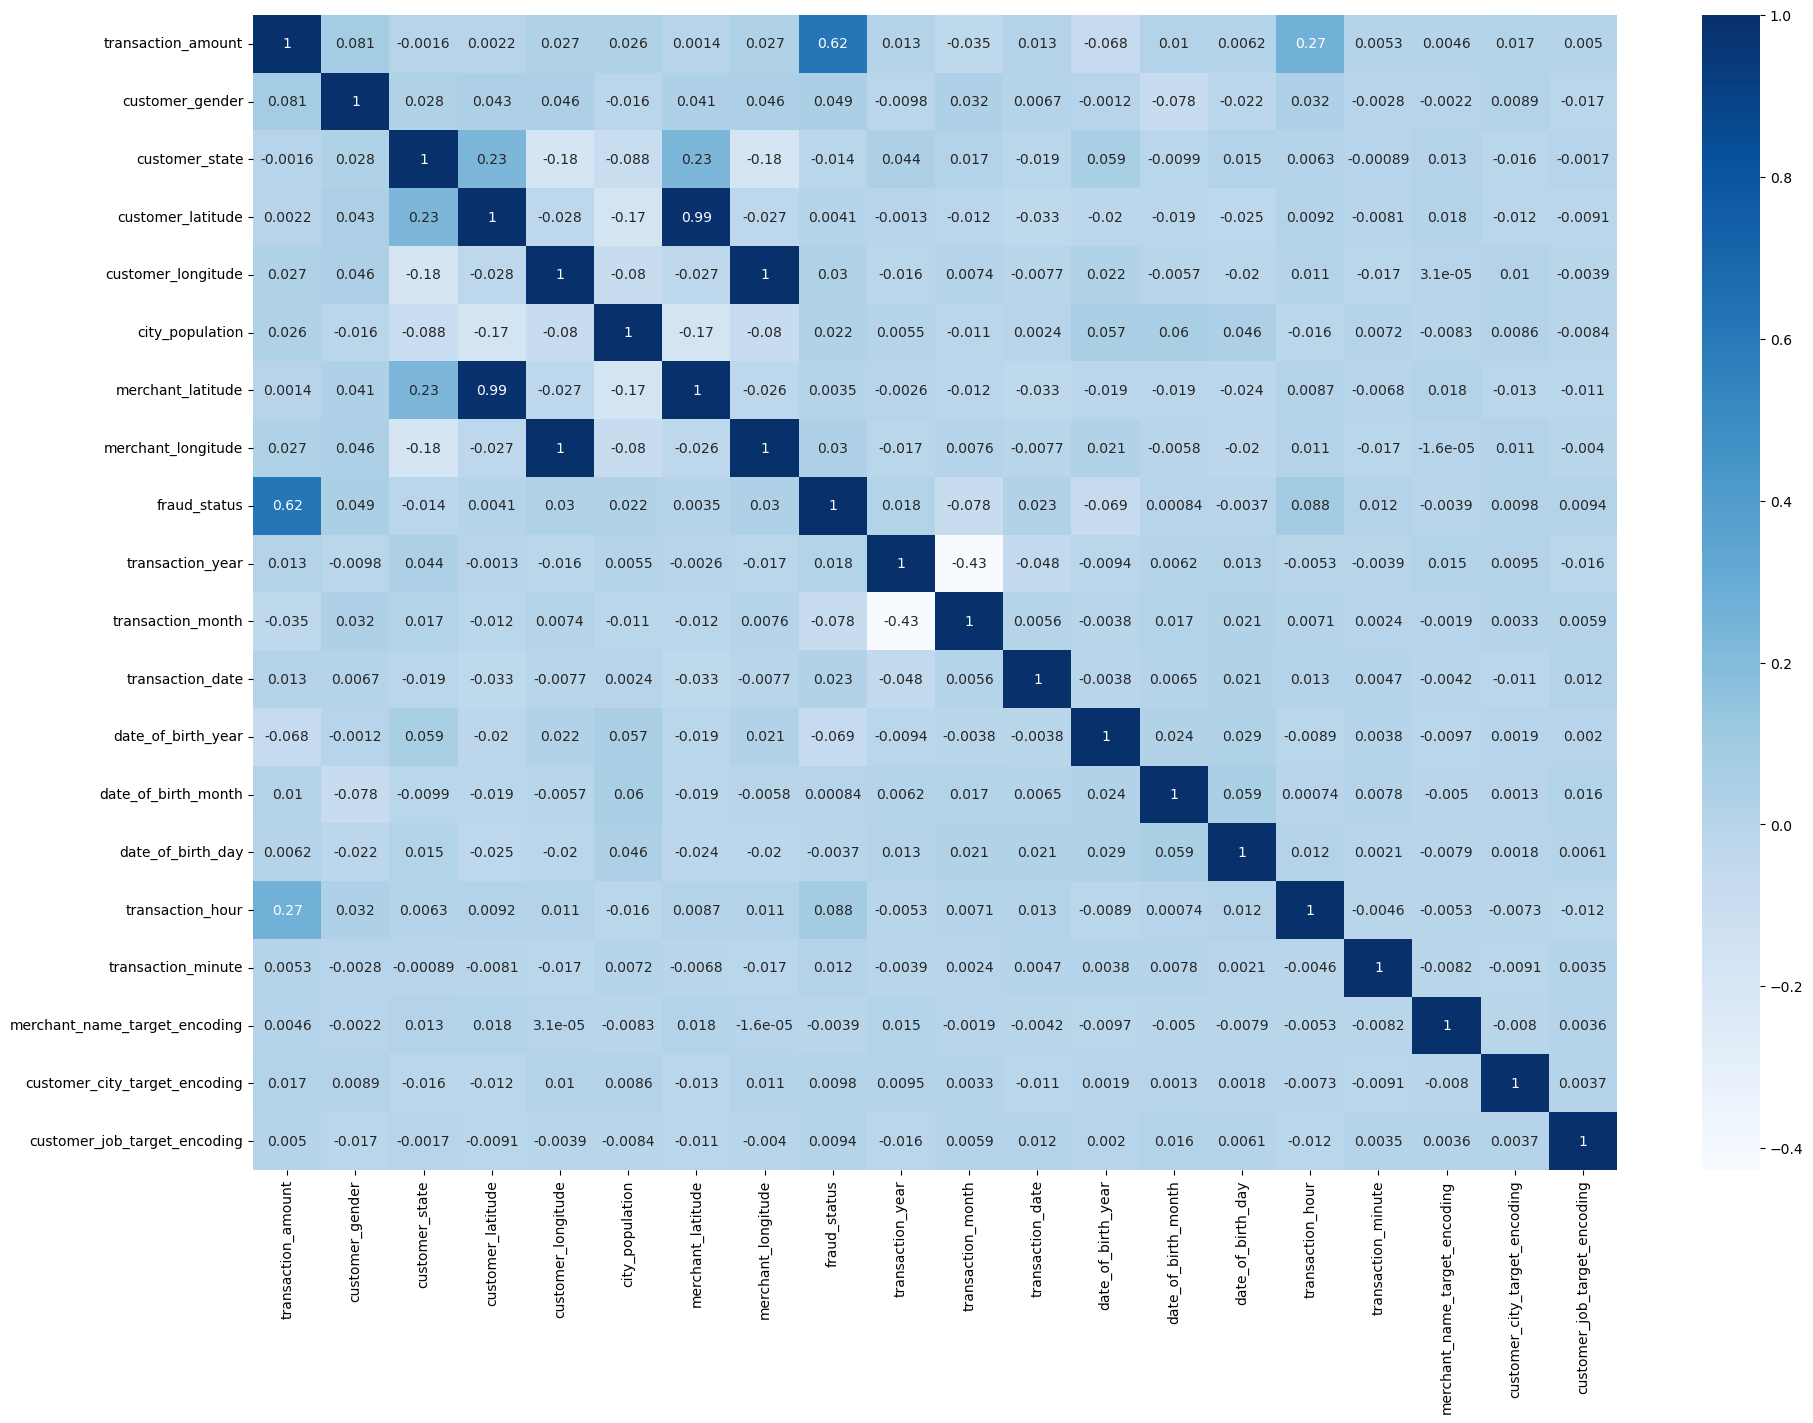

In [89]:
plt.figure(figsize=(22,15))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

In [90]:
df.head(2)

,transaction_amount,customer_gender,customer_state,customer_latitude,customer_longitude,city_population,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,281.06,1,1,35.9946,-81.7266,885,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,0.470260,0.452613,0.565963
2472,11.52,0,2,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,0.528336,0.504272,0.475075


# Logistic Regression Classifier

In [91]:
X=df.drop(columns=["fraud_status"])
y=df[["fraud_status"]]

In [92]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [93]:
#feature Scaling
#column=> mean=>
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [94]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [95]:
#Predicting the test set result
y_predict= classifier.predict(X_test)

In [96]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
cm

array([[1824,   85],
       [ 460, 1384]])

In [97]:
from sklearn.metrics import accuracy_score

LR_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy",LR_accuracy)

Accuracy 0.8547828403943512


# Support Vector Classifier

In [98]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [99]:
#Predicting the test set result
y_predicts= classifier.predict(X_test)

In [100]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicts)
cm

array([[1823,   86],
       [ 453, 1391]])

In [101]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_predicts))


Accuracy: 0.8563815614175326


# Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [103]:

# Make predictions
y__pred = clf.predict(X_test)



In [104]:
# Evaluate the model
Dt_accuracy = accuracy_score(y_test, y__pred)
print("Accuracy:", Dt_accuracy)


Accuracy: 0.9197974953370637


# Random Forest Classifier

In [105]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [106]:
#Predicting the test set result
Y_pred= classifier.predict(X_test)

In [107]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, Y_pred)
cm

array([[1808,  101],
       [ 163, 1681]])

In [108]:
# Evaluate the model
Rf_accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", Rf_accuracy)

Accuracy: 0.929656274980016


# K-Nearest Neighbors (KNN)

In [109]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
# p=1: Uses Manhattan distance instead of Euclidean distance.
#p>2: Minkowski distance becomes more sensitive to large differences in feature values.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
#Predicting the test set result
ypred= classifier.predict(X_test)

In [111]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, ypred)
cm

array([[1643,  266],
       [ 437, 1407]])

In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8126831867839062


# xgboost Model

In [113]:
import xgboost as xgb

In [114]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [115]:
y_pred = xgb_classifier.predict(X_test)


In [116]:
xg_accuracy = accuracy_score(y_test, y_pred)
print("xg_accuracy",xg_accuracy)


xg_accuracy 0.949107380762057


# Model Evaluation

In [117]:
import pandas as pd

# Assuming accuracy values are already calculated
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest Classifier', 'Decision Tree'],
    'Accuracy': [round(LR_accuracy * 100, 2), 
                 round(xg_accuracy* 100, 4), 
                 round(Rf_accuracy * 100, 2), 
                 round(Dt_accuracy * 100, 2)]
})

print(model_ev)


                      Model  Accuracy
0       Logistic Regression   85.4800
1                   XGBoost   94.9107
2  Random Forest Classifier   92.9700
3             Decision Tree   91.9800


In [118]:
# colors = ['red','green','blue','gold']
# plt.figure(figsize=(12,5))
# plt.title("Barplot Represent Accuracy of different models")
# plt.xlabel("Accuracy %")
# plt.xticks(rotation=90)
# plt.ylabel("Algorithms")
# plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
# plt.show()

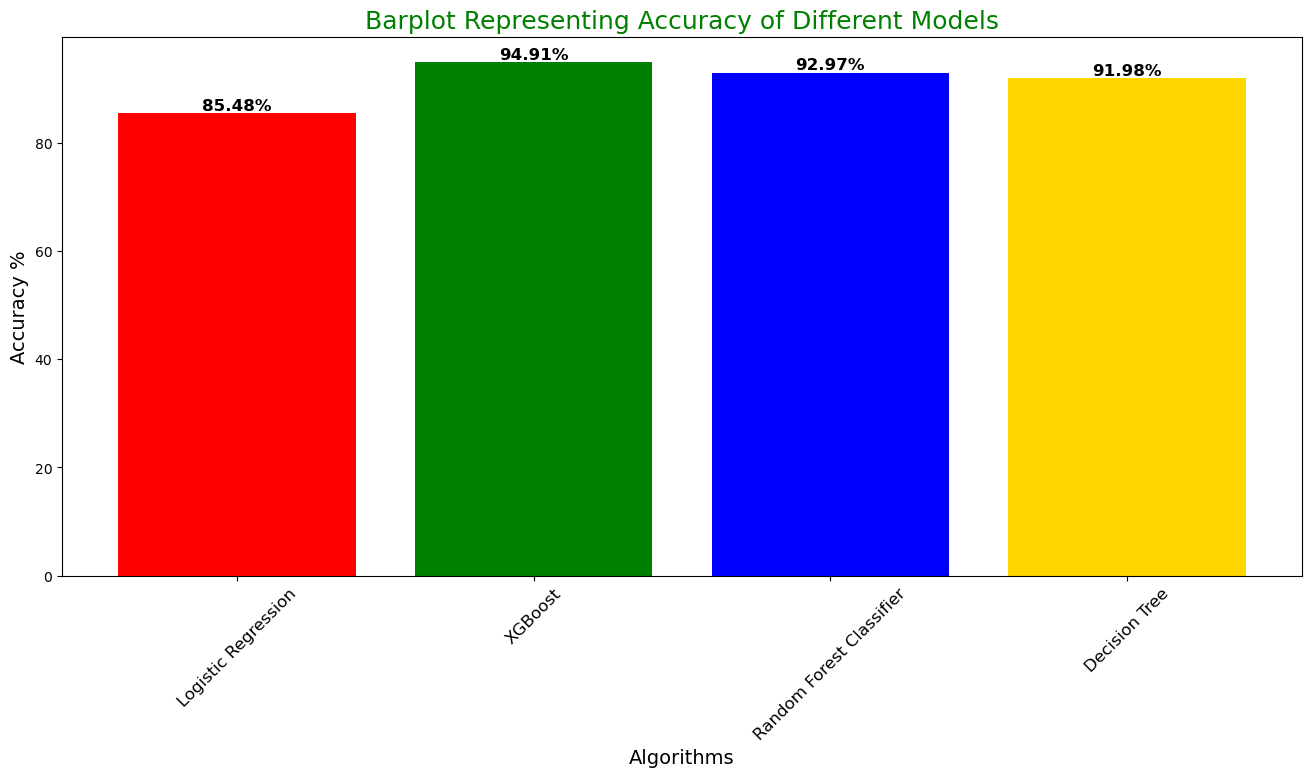

In [119]:

colors = ['red', 'green', 'blue', 'gold']

plt.figure(figsize=(16, 7))
plt.title("Barplot Representing Accuracy of Different Models",fontsize=18,color="green")
plt.xlabel("Algorithms",fontsize=14)
plt.ylabel("Accuracy %",fontsize=14)
plt.xticks(rotation=45,fontsize=12)  # Rotating for better visibility

# Creating the bar plot
bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)

# Adding labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # X-coordinate (center of the bar)
             bar.get_height(),                 # Y-coordinate (top of the bar)
             f"{bar.get_height():.2f}%",       # Text (formatted accuracy)
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


In [120]:
df.head(3)

,transaction_amount,customer_gender,customer_state,customer_latitude,customer_longitude,city_population,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,281.06,1,1,35.9946,-81.7266,885,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,0.470260,0.452613,0.565963
2472,11.52,0,2,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,0.528336,0.504272,0.475075
2523,276.31,0,2,29.4400,-98.4590,1595797,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,0.540743,0.529932,0.486806


In [121]:
import joblib
joblib.dump(xgb_classifier,"fraud_detection_model.pkl")

['fraud_detection_model.pkl']

In [121]:
model_check = joblib.load("fraud_detection_model.pkl")
# Feature names jo input lene hain
feature_names = ["transaction_amount","customer_gender","customer_state","zipcode","customer_latitude","customer_longitude","city_population",
                 "merchant_latitude","merchant_longitude","fraud_status","transaction_year","transaction_month","transaction_date",
                 "date_of_birth_year","date_of_birth_month","date_of_birth_day","transaction_hour","transaction_minute","transaction_second",
                 "merchant_name_target_encoding","customer_city_target_encoding","customer_job_target_encoding"
   
]


In [122]:
def get_user_input():
    print("\n🔹 Enter the feature values:")
    features = []

In [ ]:
# for feature in feature_names:
#     while True:
#         try:
#             value = float(input(f"Enter {feature}: "))  # Ensuring input is numeric
#             features.append(value)
#             break  # Exit loop if input is valid
#         except ValueError:
#             print("Invalid input! Please enter a numeric value.")
    
# return np.array(features).reshape(1, -1)  # Reshape for model input


In [126]:
df.head(10)

,transaction_amount,customer_gender,customer_state,zipcode,customer_latitude,customer_longitude,city_population,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,date_of_birth_year,date_of_birth_month,date_of_birth_day,transaction_hour,transaction_minute,transaction_second,merchant_name_target_encoding,customer_city_target_encoding,customer_job_target_encoding
2449,281.06,1,1,28611,35.9946,-81.7266,885,36.430124,-81.179483,1,2019,1,2,1988,9,15,1,6,37,0.568114,0.531302,0.519079
2472,11.52,0,2,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2019,1,2,1960,10,28,1,47,29,0.450744,0.498463,0.534539
2523,276.31,0,2,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1,2019,1,2,1960,10,28,3,5,23,0.456236,0.498662,0.555739
2546,7.03,1,1,28611,35.9946,-81.7266,885,35.909292,-82.091010,1,2019,1,2,1988,9,15,3,38,3,0.524915,0.513871,0.514430
2553,275.73,0,2,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1,2019,1,2,1960,10,28,3,55,47,0.422131,0.504105,0.542482
2937,844.80,1,1,28611,35.9946,-81.7266,885,35.987802,-81.254332,1,2019,1,2,1988,9,15,13,38,8,0.492740,0.503314,0.514653
3527,843.91,1,1,28611,35.9946,-81.7266,885,35.985612,-81.383306,1,2019,1,2,1988,9,15,23,52,8,0.499717,0.345819,0.478757
3580,10.76,0,2,78208,29.4400,-98.4590,1595797,28.856712,-97.794207,1,2019,1,3,1960,10,28,1,5,27,0.486875,0.551900,0.460870
3600,332.35,0,2,78208,29.4400,-98.4590,1595797,29.320662,-97.937219,1,2019,1,3,1960,10,28,1,35,52,0.472262,0.551794,0.569093
3671,315.34,0,2,78208,29.4400,-98.4590,1595797,28.953283,-97.806528,1,2019,1,3,1960,10,28,3,17,36,0.463801,0.558736,0.459491


In [128]:
import numpy as np
import joblib  # Model load karne ke liye

# Pehle trained model ko load karo
model_check = joblib.load("fraud_detection_model.pkl")
# Feature names jo input lene hain
feature_names = ["transaction_amount","customer_gender","customer_state","zipcode","customer_latitude","customer_longitude","city_population",
                 "merchant_latitude","merchant_longitude","transaction_year","transaction_month","transaction_date",
                 "date_of_birth_year","date_of_birth_month","date_of_birth_day","transaction_hour","transaction_minute","transaction_second",
                 "merchant_name_target_encoding","customer_city_target_encoding","customer_job_target_encoding"
   
]

# User se input lene ka function
def get_user_input():
    print("\n🔹 Enter the feature values:")
    features = []
    
    for feature in feature_names:
        value = float(input(f"Enter {feature}: "))  # Input as float convert karna zaroori hai
        features.append(value)
    
    return np.array(features).reshape(1, -1)  # Model ke format me reshape karein

# User input lo
user_data = get_user_input()

# Model se prediction lo
prediction = xgb_classifier(user_data)

# Probability calculate karo
probability = xgb_classifier.predict_proba(user_data)[0][1]  # Fraud hone ki probability

# Output dikhana

if prediction[0] == 1:
    print("\n🚨 Fraud Detected!")
else:
    print("\n✅ No Fraud Detected!")


🔹 Enter the feature values:


TypeError: 'XGBClassifier' object is not callable

In [ ]:
# # import numpy as np
# # import joblib  # Model load karne ke liye

# # # Pehle trained model ko load karo
# # model_check = joblib.load("fraud_detection_model.pkl")
# # # Feature names jo input lene hain
# # feature_names = ["transaction_amount", "customer_gender", "customer_state", "zipcode", "customer_latitude", "customer_longitude", "city_population",
# #                  "merchant_latitude", "merchant_longitude", "transaction_year", "transaction_month", "transaction_date",
# #                  "date_of_birth_year", "date_of_birth_month", "date_of_birth_day", "transaction_hour", "transaction_minute", "transaction_second",
# #                  "merchant_name_target_encoding", "customer_city_target_encoding", "customer_job_target_encoding"]

# # # User se input lene ka function
# # def get_user_input():
# #     print("\n🔹 Enter the feature values:")
# #     features = []
    
# #     for feature in feature_names:
# #         value = float(input(f"Enter {feature}: "))  # Input as float convert karna zaroori hai
# #         features.append(value)
    
# #     return np.array(features).reshape(1, -1)  # Model ke format me reshape karein

# # # User input lo
# # user_data = get_user_input()

# # # Model se prediction lo
# # prediction = xgb_classifier.predict(user_data)

# # # Probability calculate karo
# # probability = xgb_classifier.predict_proba(user_data)[0][1]  # Fraud hone ki probability

# # # Output dikhana
# # if prediction[0] == 1:
# #     print("\n🚨 Fraud Detected!")
# #     print(f"Fraud Probability: {probability:.2f}")
# else:
#     print("\n✅ No Fraud Detected!")
    print(f"Fraud Probability: {probability:.2f}")

IndentationError: unexpected indent (3996787202.py, line 38)

In [ ]:
df.head(10)